In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'

Mounted at /content/drive
 bpm.behnejadi.rar
'Colab Notebooks'
'Copy of data.aug.rar'
 data.aug
 data.aug.rar
 data.mobilenet
 data.resnet50
 data.row
 dataset
 data.v
 data.vgg16
 data.xception
 IEEE_Iran_Section_Certificate_AIDLinAutoRobotics__Fateme_behnejadi__125598.pdf
 thesis


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = '/content/drive/My Drive/data.resnet50/tc-ts/train'
valid_path = '/content/drive/My Drive/data.resnet50/tc-ts/valid'
test_path = '/content/drive/My Drive/data.resnet50/tc-ts/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input ) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input ) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input ) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10, shuffle=False)

Found 2093 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [ ]:
resnet50 = tf.keras.applications.ResNet50() 
resnet50.summary()

102973440/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
x = resnet50.layers[-2].output

In [ ]:
output = Dense(units=2, activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet50.input, outputs=output)

In [ ]:
#for layer in model.layers[:-23]:
#   layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True
for layer in model.layers[:175]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=100,
            verbose=2
)

Epoch 1/100
210/210 - 904s - loss: 0.6912 - accuracy: 0.6331 - val_loss: 0.6537 - val_accuracy: 0.6000
Epoch 2/100
210/210 - 14s - loss: 0.5454 - accuracy: 0.7339 - val_loss: 0.5896 - val_accuracy: 0.6778
Epoch 3/100
210/210 - 14s - loss: 0.5167 - accuracy: 0.7468 - val_loss: 0.5642 - val_accuracy: 0.7222
Epoch 4/100
210/210 - 14s - loss: 0.4969 - accuracy: 0.7587 - val_loss: 0.5567 - val_accuracy: 0.7222
Epoch 5/100
210/210 - 14s - loss: 0.4811 - accuracy: 0.7678 - val_loss: 0.5462 - val_accuracy: 0.7333
Epoch 6/100
210/210 - 14s - loss: 0.4661 - accuracy: 0.7702 - val_loss: 0.5332 - val_accuracy: 0.7333
Epoch 7/100
210/210 - 14s - loss: 0.4549 - accuracy: 0.7807 - val_loss: 0.5424 - val_accuracy: 0.7667
Epoch 8/100
210/210 - 14s - loss: 0.4432 - accuracy: 0.7817 - val_loss: 0.5273 - val_accuracy: 0.7556
Epoch 9/100
210/210 - 14s - loss: 0.4362 - accuracy: 0.7864 - val_loss: 0.5423 - val_accuracy: 0.7556
Epoch 10/100
210/210 - 13s - loss: 0.4265 - accuracy: 0.7974 - val_loss: 0.5374 -

In [16]:
#for layer in model.layers[165:]:
    layer.trainable = True
#for layer in model.layers[:165]:
    layer.trainable = False

In [17]:
#model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#model.fit(x=train_batches,
           # steps_per_epoch=len(train_batches),
           # validation_data=valid_batches,
           # validation_steps=len(valid_batches),
           # epochs=100,
           # verbose=2
#)

Epoch 1/100
210/210 - 16s - loss: 1.8974e-06 - accuracy: 1.0000 - val_loss: 1.6747 - val_accuracy: 0.6556
Epoch 2/100
210/210 - 15s - loss: 1.1349e-06 - accuracy: 1.0000 - val_loss: 1.7371 - val_accuracy: 0.6667
Epoch 3/100
210/210 - 15s - loss: 8.8047e-07 - accuracy: 1.0000 - val_loss: 1.7803 - val_accuracy: 0.6667
Epoch 4/100
210/210 - 15s - loss: 5.4666e-07 - accuracy: 1.0000 - val_loss: 1.8187 - val_accuracy: 0.6667
Epoch 5/100
210/210 - 15s - loss: 4.0017e-07 - accuracy: 1.0000 - val_loss: 1.8723 - val_accuracy: 0.6667
Epoch 6/100
210/210 - 15s - loss: 3.0806e-06 - accuracy: 1.0000 - val_loss: 1.8179 - val_accuracy: 0.6222
Epoch 7/100
210/210 - 15s - loss: 2.8249e-06 - accuracy: 1.0000 - val_loss: 1.8884 - val_accuracy: 0.6667
Epoch 8/100
210/210 - 15s - loss: 5.2439e-07 - accuracy: 1.0000 - val_loss: 1.8939 - val_accuracy: 0.6667
Epoch 9/100
210/210 - 15s - loss: 4.7683e-07 - accuracy: 1.0000 - val_loss: 1.9007 - val_accuracy: 0.6667
Epoch 10/100
210/210 - 15s - loss: 3.2459e-07 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-41cb37d9e2e6>", line 6, in <module>
    verbose=2
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1098, in fit
    tmp_logs = train_function(iterator)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/def_function.py", line 780, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/def_function.py", line 807, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/function.py"

KeyboardInterrupt: ignored

In [19]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
test_batches.class_indices

{'TC': 1, 'TS': 0}

Confusion matrix, without normalization
[[25 10]
 [13 47]]


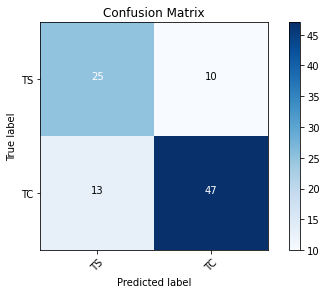

In [24]:
cm_plot_labels = ['TS','TC']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')